<a href="https://colab.research.google.com/github/yohanesnuwara/machine-learning/blob/master/07_gradient_descent/stochastic_grad_descent_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Regression using Stochastic Gradient Descent**

**Gradient descent** is an optimization algorithm used to and the values of parameters (coefficients)
of a function (f) that minimizes a cost function (**cost**).

Procedure:
1. Start off with initial values for coefficients for the function (e.g. $B_0=0$ and $B_1=0$ in linear regression).
2. Calculate cost by plugging the coeff to function: $cost = f(coeff)$
3. Calculate derivative of the cost (**error** between the true $y$ data and cost): $\Delta = derivative(cost)$
4. Set **learning rate $\alpha$** to control how much the coeff change each update ($\alpha$ is small: 0.1, 0.01, 0.001)
5. Calculate the new coeff: $coeff new =coeff initial-(\alpha \cdot \Delta)$ 
6. Iterate over **training instances**.

2 methods of GD:
* **Batch Gradient Descent**
* **Stochastic Gradient Descent**

Stochastic GD has benefit over Batch GD, especially for **large dataset** which Batch can be slower. 



## Stochastic Gradient Descent

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [114]:
!git clone https://www.github.com/yohanesnuwara/machine-learning

Cloning into 'machine-learning'...
remote: Enumerating objects: 168, done.
remote: Counting objects: 100% (168/168), done.
remote: Compressing objects: 100% (163/163), done.
remote: Total 168 (delta 71), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (168/168), 466.89 KiB | 841.00 KiB/s, done.
Resolving deltas: 100% (71/71), done.


Create dataset and visualize it.

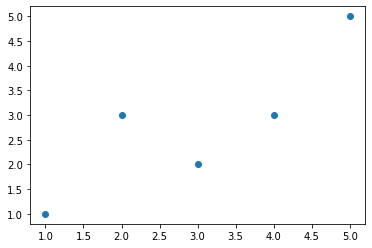

In [77]:
x = [1, 2, 4, 3, 5]
y = [1, 3, 3, 2, 5]

# visualize our data 
plt.plot(x, y, 'o')

The objective of Stochastic GD in linear regression problem is to find $B_0$ and $B_1$ coefficients. The function for linear regression is:
$$y = B_0 + B_1 \cdot x$$

Make the **initial guess** of coefficients: $B_0=0$ and $B_1=0$

In [0]:
# initial value
B0 = 0; B1 = 0

After this here comes the **iteration**. 
1. In the **first iteration**, **cost** is calculated on the very first datapoint, here $x_1 = 1$, we call it the **first training instance**. These are plugged with the initial coefficients, so: $cost = 0+(0)(1)=0$. 
2. Then the **error** is calculated by subtracting the **first y value** ($y_1 = 1$): $\Delta = cost - y = 0-1 = -1$
3. Set the learning rate: $\alpha = 0.1$
4. Update the coefficient $B_0$: $$B_0 new = B_0 old-(\alpha \cdot \Delta)=0-(0.01)(-1)=0.01$$
5. And the coefficient $B_1$: $$B_1 new = B_1 old-(\alpha \cdot \Delta)=0-(0.01)(-1)=0.01$$
6. Repeat to step 1, to calculate cost for the **second training instance**, here $x_2 = 2$, and then the **cost**, **error**, and updated **coeffs**
7. When iteration reaches the last training instance (5th iteration), it is said that **one epoch has finished**. The 6th iteration go back to the **first training instance**, and **the second epoch starts**.
8. So, if **50 iterations** are set, and there are **5 training instances** (like in the case here), there are **10 epochs**.
9. When the epochs finished, the last coeff $B_0$ and $B_1$ is our regression parameters, and then calculate its **RMSE**.

All of these iterations will be wrapped up in **for loop**.

We will iterate over **10 epochs (50 iterations)**

In [91]:
epoch = 10
ndata = len(x)
iteration = ndata * epoch

# initial value
B0 = 0; B1 = 0
alpha = .01 # learning rate

p_arr = []
err_arr = []
B0_arr = []
B1_arr = []

for j in range(epoch):
  for i in range(len(x)):
    p = B0 + B1 * x[i]
    err = p - y[i]
    B0 = B0 - alpha * err
    B1 = B1 - alpha * err * x[i]
    p_arr.append(float(p))
    err_arr.append(float(err))
    B0_arr.append(float(B0))
    B1_arr.append(float(B1))
  # print('Passing epoch', j+1)

print(err_arr)

[-1.0, -2.97, -2.6827, -1.403349, -3.8253971599999996, -0.47110721040000003, -2.046895666088, -1.03309625593208, -0.3545210560866696, -2.3036953597867162, -0.19622081958208615, -1.5674626316596445, -0.17672345174867665, 0.19006757281465836, -1.5138393143678073, -0.05320869570373943, -1.3183705340647367, 0.2678307894509455, 0.47287138841609977, -1.1039317000741065, 0.0213361012275326, -1.1888653716298863, 0.4985830101510671, 0.6197646622316992, -0.8912792113379995, 0.060332356035337265, -1.1214473577520871, 0.6183367711121655, 0.6960971103792599, -0.7810336079937468, 0.08087042315603932, -1.086264512806495, 0.6804642383472626, 0.7357961246054021, -0.7239528688858101, 0.09182306530868267, -1.0678186737216233, 0.712674451465058, 0.7564756770243002, -0.6944721959161928, 0.09779674631490431, -1.0580636988977643, 0.729353013430293, 0.7672803579927705, -0.6793192129773269, 0.10118301014295339, -1.0528222870978792, 0.737968444664983, 0.7729577381545512, -0.6716033581154068]


Plot **error** and **cost** versus iteration. This is the **learning rate** plot.

Text(0, 0.5, 'Error')

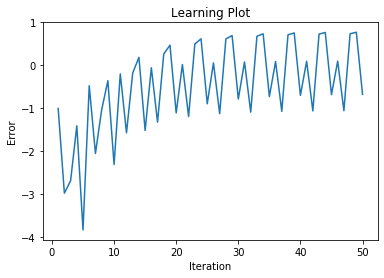

In [97]:
j = np.arange(1, iteration+1, 1)
plt.plot(j, err_arr)
plt.title('Learning Plot')
plt.xlabel('Iteration'); plt.ylabel('Error')

Because the coefficients are updated after every training instance, the updates will be noisy, jumping all over the place, and so will the corresponding cost function, but the **error** converges to 0. 

So, the final coefficient $B_0$ and $B_1$ are:

In [111]:
B0_updated = B0_arr[iteration-1]
B1_updated = B1_arr[iteration-1]
B0_updated, B1_updated

(0.2532759816020052, 0.8499475066785186)

Test the coefficients into our **test data** and plot the regression result

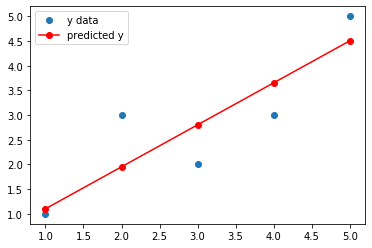

In [113]:
x_test = np.array([1, 2, 3, 4, 5])
y_predicted = B0_updated + B1_updated * x_test

p1 = plt.plot(x, y, 'o', )
p2 = plt.plot(x_test, y_predicted, 'o-', color='r')
plt.legend((p1[0], p2[0]), (['y data', 'predicted y']))

And calculate the RMSE. Import the function from folder `06_simple_linear_regression`

In [118]:
import sys, os
sys.path.append('/content/machine-learning/06_simple_linear_regression')

from simple_linear_regression import linreg_error

rmse = linreg_error(y, y_predicted)
rmse

0.9082831246757105

$RMSE = 0.908$ is even higher than the **simple linear regression** method ($RMSE = 0.693$)

## Observing the Effect of Learning Rate Parameter ($\alpha$)

### Wrap up

In [0]:
def stochastic_grad_descent(x, y, epoch, alpha):
  import numpy as np
  x = np.array(x); y = np.array(y)
  ndata = len(x)
  iteration = epoch * ndata
  # initial value
  B0 = 0; B1 = 0

  p_arr = []
  err_arr = []
  B0_arr = []
  B1_arr = []

  for j in range(epoch):
    for i in range(len(x)):
      p = B0 + B1 * x[i]
      err = p - y[i]
      B0 = B0 - alpha * err
      B1 = B1 - alpha * err * x[i]
      p_arr.append(float(p))
      err_arr.append(float(err))
      B0_arr.append(float(B0))
      B1_arr.append(float(B1))
      # print('Passing epoch', j+1)
    
  B0_updated = B0_arr[iteration-1]
  B1_updated = B1_arr[iteration-1]
  j_iteration = np.arange(1, iteration+1, 1) # j_iteration is variable for plotting
  return(err_arr, j_iteration, B0_updated, B1_updated)

Text(0, 0.5, 'Error')

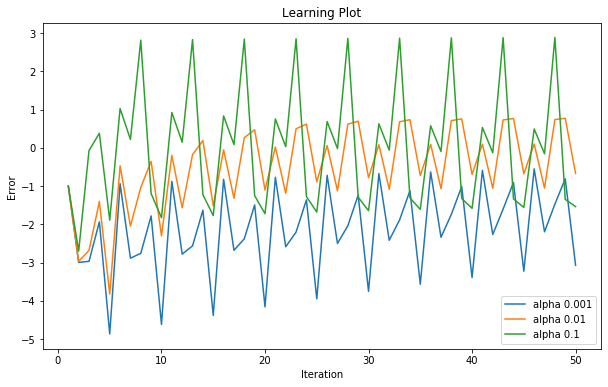

In [109]:
x = [1, 2, 4, 3, 5]
y = [1, 3, 3, 2, 5]

# alpha 0.001
err_arr1, j_iteration1, B0_updated1, B1_updated1 = stochastic_grad_descent(x, y, 10, .001)

# alpha 0.01
err_arr2, j_iteration2, B0_updated2, B1_updated2 = stochastic_grad_descent(x, y, 10, .01)

# alpha 0.1 (faster learning rate)
err_arr3, j_iteration3, B0_updated3, B1_updated3 = stochastic_grad_descent(x, y, 10, .1)

plt.figure(figsize=(10, 6))
p1 = plt.plot(j_iteration1, err_arr1)
p2 = plt.plot(j_iteration2, err_arr2)
p3 = plt.plot(j_iteration3, err_arr3)
plt.legend((p1[0], p2[0], p3[0]), (['alpha 0.001', 'alpha 0.01', 'alpha 0.1']))
plt.title('Learning Plot')
plt.xlabel('Iteration'); plt.ylabel('Error')

We can see that **$\alpha = .01$** is the best. 